# Why rally?: Social categorization and biased political assessments

*Extracts from a larger study*

---

If you remember the terrorist attacks of September 11th, 2001, it's likely you remember some terrible images of the attack itself and its immediate aftermath. Played and re-played countless times after, they quickly turned from current events to the stuff of history. You probably also remember sudden appearances across the country of things that had never been commonplace but soon were. Terrorism had always been a security threat, but soon it dominated the political narrative about national security - as it still does today. At least for some period of time, heavily armed police and military personnel could be seen at airports and other major transit hubs. American flags sprouted up in every public place and approval of the President soared to [the highest levels ever recorded](http://www.gallup.com/poll/4924/Bush-Job-Approval-Highest-Gallup-History.aspx).

It's this last part that deserves a little more attention. Increased support of the president following national security crisis is something that seems intuitive, perhaps because that's often our experience. But on closer inspection it's hard to explain exactly why this is the response the public would have. In the case of 9/11, the nation had just experienced a devastating lapse of security. The president is the most public face representing the system that exists to provide security to the country as a whole. If we believe that democratic citizens hold their leaders to account for failures, then we might expect public opinion to blame the President for lapses in security.

On the other hand, perhaps citizens consider this to be more like a natural disaster: some amount of preparation can be made, but we judge our leaders more by how they respond than for their ability to accurately predict calamity. Yet the surge in popular support came before George W. Bush could really do anything meaningful to put citizens at ease. This reaction appears to be almost automatic.

This so-called "rally-round-the-flag effect" (or "rally effect"), is well documented: at least as far back as the early 70s, scholars noted that surges of patriotism and support for the president accompanied attacks by foreign enemies. But it wasn't just the President that people expressed greater support for after 9/11: reported trust in the federal government had been on a steady decline since the 1960s but saw a sharp rise following 9/11. Two weeks after the attacks, 89% of respondents expressed confidence that [the US government could protect them from future attacks](http://www.gallup.com/poll/4897/Confidence-Leaders.aspx), though a week previous, roughly half were at least somehat worried that they or a family member would become a victim of one. [Respondents reported to Gallup](http://www.gallup.com/poll/4906/Attack-America-Review-Public-Opinion.aspx) that they were not only much happier with the way things were going in the US than they had weeks before, but also (slightly) happier with the direction of the US economy. This positive upswing in attitudes about national institutions overall doesn't seem to logically follow from the specific events that brought it about.

The broad argument of my research is that an approach borrowed from social psychology can shed some light onto how this process works. Rather than being a *sui generis* phenomenon, I argue that the rally effect is just one extreme case of a broader dynamic that can be shown to play out in other conditions. It can be seen when there are surges in pride (or disdain) for other societal groups, resulting in similarly biased assessments.

**Social categorization**

Social psychologists have shown that a social group facing a threat will tend to pay closer attention to which people belongs in the group and which not. People in the group will tend to favor and give the benefit of the doubt to other members of their group, and think less kindly of those who aren't. Of course, people belong to any number of social groups. Someone may be a woman, a person of color, a religious minority, from the midwest and a fan of indie rock. Each of these would give that person common ground with others, but each connects them to a different group of people. It's the broader social context that determines what group someone will place a person in when deciding how to feel about them. This 'social categorization' will have a big influence on the conclusions the observer end up drawing.

Consider this scenario:

>Imagine you've grown up Jewish in the American south. Most of the people you've ever met were Protestant. You grew up with friends who knew you as the Jewish person. Not in a pointed or exclusionary way, but as a fact that seemed to be the most distinctive about you. Many of them have never met a Jewish person. Some of them have seen motion pictures by Woody Allen or, perhaps, the comedy of Jerry Seinfeld, so they know a couple things about Jewish people. They ask you about it in ways that show they're genuinely curious, but making some broad assumptions about you and people like you.

>You graduate from high school and go north to a university in the New York area. You tell people you're from the south. Many of them have never met anyone from the south, so that's who you are. Some of them hear you're Jewish, but they know plenty of Jewish people. It's just less relevant here. Some of them have seen the motion picture _Deliverance_ or, perhaps, the comedy of Jeff Foxworthy. They ask you about it in ways that show they're genuinely curious, but making some broad assumptions about you and people like you.

This is a common enough experience that illustrates something about the way identity works. They way a person is perceived often has less to do with themselves, and more to do with the environment in which other people find them. The identity that makes a person more distinctive in a given context is the one that others will tend to use to make judgments, and decide which stereotypes - and biases - to draw on.

**Broad hypothesis**

I derive a basic hypothesis from this that I apply to American politics: During times when a certain category of identity is made more salient - where the difference between being in one group or the other is particularly important - we should expect people to show bias in favor of those who are more like them in terms of that salient identity. Specifically, if the most important event in a country revolves around a conflict that pits the US against a foreign power, we should expect Americans to show greater bias in favor of American leaders and institutions than they ordinarily would. And during times when what matters most in the national conversation is the conflict between members of one major political party or another - for example, during elections - we should expect partisan bias to be stronger than it normally is.

---

_What follows are excerpt from code used to parse and analyze the data in this study. This is not intended to be a comprehensive overview of this work, but to give a snapshot of some of what I've done._

---

## Experiment inducing national or partisan indentity salience with "user-generated comments"

In this study, I showed a news article that respondents read, followed by user comments to that article. Both were fabricated and respondents were told this when the study was done. The objective was to use these user comments to set up a minor conflict that would contrast different political identities and see how this impacted respondents' attitudes later on in the survey.

The news article described a somewhat frosty meeting between Obama and Putin in 2014. All respondents saw the same article, but were randomly selected to see one of three sets of comments. Each set of comments depicted commenters insulting a different group. To raise the salience of national identity I depicted commenters as trading insults about Russia and the US. In the partisan salience condition Republicans and Democrats insulted each other. And in the control condition the commenters just insulted the journalists who wrote the article. For example:

<img src="comments_sample.png">

Respondents were then asked several questions, including their approval of President Obama, John Kerry, Congress and confidence in Putin as an ally.

I show some of the analysis below:

In [5]:
### Housekeeping

# Load packages
library(stringr)
library(forcats)
library(stargazer)
library(tidyverse)
# unloadNamespace('effects')

# Load in data
dfs <- readRDS('../7_Data/dfs.RDS')
study1_clean <- readRDS(dfs$full_path[dfs$study == 'study1_clean'])

dvs_01 <- 
study1_clean %>%
select(approve_kerry, approve_obama_foreign, approve_congress_foreign, putin_confidence)

dvs_oth <- 
study1_clean %>% 
select(trust_govt_likert, trust_govt_cat, pres_trust_likert, 
       pres_trust_cat)

A subset of the raw data below. I turn it into a frequency table further down.

In [35]:
head(dvs_01)

approve_kerry,approve_obama_foreign,approve_congress_foreign,putin_confidence
Strongly / Somewhat approve,Strongly / Somewhat disapprove,Strongly / Somewhat approve,Not very much / no confidence
Strongly / Somewhat approve,Strongly / Somewhat approve,Strongly / Somewhat disapprove,Not very much / no confidence
Strongly / Somewhat disapprove,Strongly / Somewhat disapprove,Strongly / Somewhat disapprove,Not very much / no confidence
Strongly / Somewhat disapprove,Strongly / Somewhat disapprove,Strongly / Somewhat disapprove,Not very much / no confidence
Strongly / Somewhat disapprove,Strongly / Somewhat disapprove,Strongly / Somewhat approve,Not very much / no confidence
Strongly / Somewhat approve,Strongly / Somewhat approve,Strongly / Somewhat disapprove,Not very much / no confidence


In [6]:
# Make a composite frequency table of the DVs I'll use in my analysis from the above^

var_frequency_pct <-
dvs_01 %>%
map(., fct_count) %>%
lmap(., function(x){
    list(
    mutate(x[[1]], var= names(x)) %>%
    select(var, everything())
    )
}) %>%
reduce(rbind) %>%
filter(f!="NA") %>%
group_by(var) %>%
mutate(
    pct = n/sum(n)*100,
    pct = str_c(sprintf("%2.1f", pct), "%"),
    pct_num = str_extract(pct, "^[0-9]+.[0-9]+") %>% as.numeric) %>%
rename(value=f) %>%
arrange(fct_reorder(factor(var), pct_num, first))

var_frequency_pct %>%
select(-pct_num)

var,value,n,pct
approve_kerry,Strongly / Somewhat disapprove,162,39.9%
approve_kerry,Strongly / Somewhat approve,244,60.1%
approve_obama_foreign,Strongly / Somewhat disapprove,232,57.1%
approve_obama_foreign,Strongly / Somewhat approve,174,42.9%
approve_congress_foreign,Strongly / Somewhat disapprove,322,79.7%
approve_congress_foreign,Strongly / Somewhat approve,82,20.3%
putin_confidence,Not very much / no confidence,326,80.7%
putin_confidence,A lot / some confidence,78,19.3%


## Questionnaire wordings

**Dependent variable items**

<i>
How much do you approve or disapprove of the job John Kerry is doing as Secretary of State?
*	Strongly approve (1)
*	Somewhat approve (2)
*	Somewhat disapprove (3)
*	Strongly disapprove (4)

How much do you approve or disapprove of the job Barack Obama is doing as President in handling foreign affairs?
*	Strongly approve (1)
*	Somewhat approve (2)
*	Somewhat disapprove (3)
*	Strongly disapprove (4)

How much do you approve or disapprove of the job Congress is doing in handling foreign affairs?
*	Strongly approve (1)
*	Somewhat approve (2)
*	Somewhat disapprove (3)
*	Strongly disapprove (4)

How much confidence do you have that Russian President Vladimir Putin will do the right thing regarding world affairs?
*	A lot of confidence (1)
*	Some confidence (2)
*	Not very much confidence (3)
*	No confidence at all (4)
</i>

**Scale items for Trust in Government**

<i>How much of the time do you think you can trust the government in Washington to do what is right?
*	Just about always (1)
*	Most of the time (2)
*	Only some of the time (3)

Would you say the government is run for the benefit of all the people, or that it is pretty much run by a few big interests looking out for themselves?
*	Government is run for the benefit of all (1)
*	Government is run by a few big interests (2)

Do you think that people in government waste a lot of the money we pay in taxes, waste some of it, or don't waste very much of it?
*	Waste a lot (1)
*	Waste some (2)
*	Don't waste very much (3)

Do you think that quite a few of the people running the government are crooked, not very many, or do you think hardly any of them are crooked?
*	Quite a few are crooked (1)
*	Not very many are crooked (2)
*	Hardly any are crooked (3)</i>

**Scale items for American identification**

<i>How important is being American to you?
*	Extremely Important (1)
*	Very Important (2)
*	Somewhat important (3)
*	Not very important (4)

How well does the term American describe you?
*	Extremely well (1)
*	Very well (2)
*	Not very well (3)
*	Not well at all (4)

 
To what extent do you see yourself as a typical American?
*	A great deal (1)
*	Somewhat (2)
*	Very little (3)
*	Not at all (4)

When talking about Americans, how often do you say "we" instead of "they"?
*	All of the time (1)
*	Most of the time (2)
*	Some of the time (3)
*	Rarely (4)
*   Never (5)</i>

### Distribution of selected variables, overall (in gray) and by party (colored line)

I show the distribution of a couple continuous variables here

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”

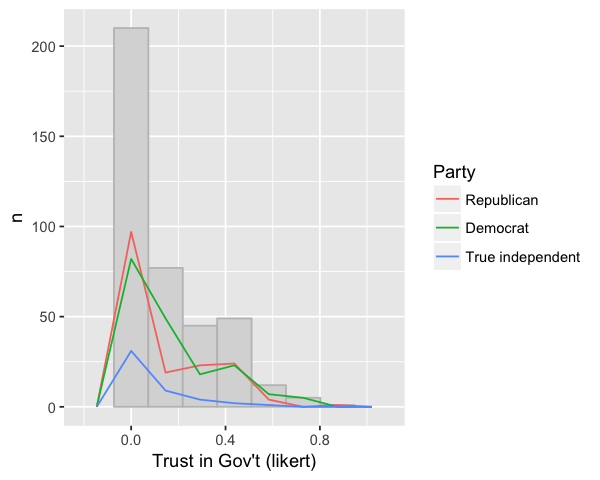

In [7]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(study1_clean) +
  geom_histogram(mapping = aes(trust_govt_likert), 
                 bins=7, color = "grey75", fill = "grey85") +
  geom_freqpoly(mapping = aes(trust_govt_likert, color = pid3_recoded), bins=7) +
  labs(x = "Trust in Gov't (likert)", y = "n", color = "Party", )

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”

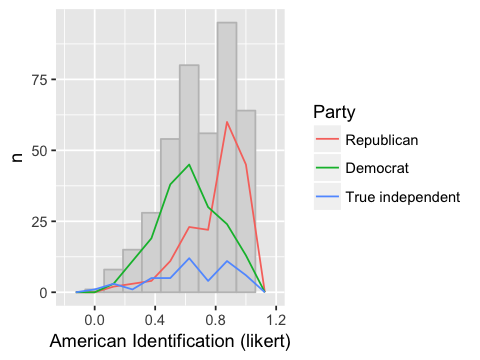

In [8]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot(study1_clean) +
  geom_histogram(mapping = aes(amer_id_likert), 
                 bins=9, color = "grey75", fill = "grey85") +
  geom_freqpoly(mapping = aes(amer_id_likert, color = pid3_recoded), bins=9) +
  labs(x = "American Identification (likert)", y = "n", color = "Party")

## Modeling

Here I build functions that lets me programmatically build models and generate charts. The first two functions takes strings as input, indicating the model specifications. That way I can store the formulas in a list and automate fitting many models at once and visualizing the results.

In [9]:
# Programmatically build models and generate charts and tables

library(effects)

# Builds a glm model from a string specifying the formula
# Returns a model object
mod_build_glm <- function(f, d){
    formula <- as.formula(f)
    
    glm(formula, data=d, family=binomial(link="logit"))
}

mod_build_lm <- function(f, d){
    formula <- as.formula(f)
    
    lm(formula, data=d)
}

# takes a model object
# prints a chart and a summary table
table_and_chart <- function(f, d, glm=TRUE){
    if (glm)
        walk(f, function(x){mod_build_glm(x, d=d)}) %>%
    map(., allEffects) %>%
    map(plot)
}

Here's just one of the models, with some interesting results.


OLS Regression: Trust in Gov't ~ Treatment x American Identification
-----------------------------------------------------
                                  trust_govt_likert  
-----------------------------------------------------
treatmentparty_id                        0.1         
                                        (0.1)        
treatmentctl                             0.01        
                                        (0.1)        
amer_id_likert                          0.2***       
                                        (0.1)        
treatmentparty_id:amer_id_likert        -0.2**       
                                        (0.1)        
treatmentctl:amer_id_likert              -0.1        
                                        (0.1)        
Constant                                 0.01        
                                        (0.1)        
N                                        394         
R-squared                                0.04        
Adj. R-squar

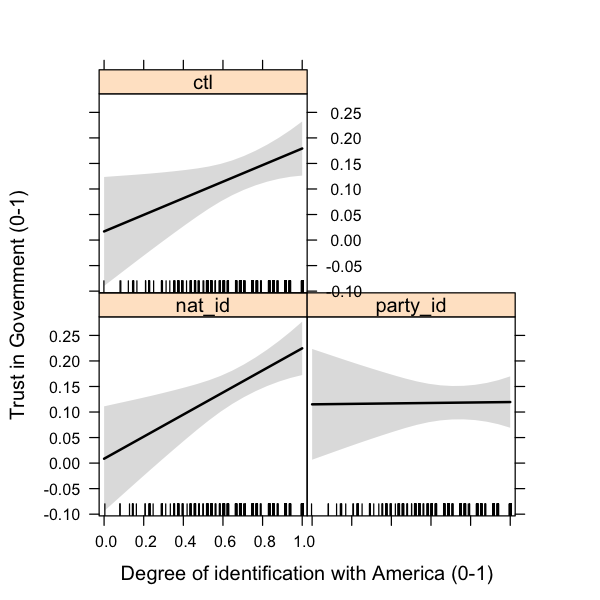

In [32]:
options(repr.plot.width=5, repr.plot.height=5)

f <- 'trust_govt_likert ~ treatment  + amer_id_likert *treatment'

m <- mod_build_lm(f, d=study1_clean)

stargazer(m,
         type = "text",
          title="OLS Regression: Trust in Gov't ~ Treatment x American Identification", 
          digits=1, 
          style="ajps"
         )

plot(allEffects(m), factor.names=F, 
     ylab="Trust in Government (0-1)", 
     xlab="Degree of identification with America (0-1)",
     main = "")

The table shows the output of a regression model predicting a respondent's reported trust in government as a function of the treatment conditions in the study (that is, which comments they saw associated with the article) and how stongly identified with America they reported they were. 

There's a positive slope under the National identity salience ('nat_id') condition as well as the control ('ctl'), but not for the party identity ('party_id') condition. This means that, when shown purportedly user-generated comments that insulted Democrats and Republicans, whether someone felt very 'American' or not didn't matter in how much they said they trust government. Something else was driving their response. But when shown comments that insulted Americans (and journalists, for that matter), how 'American' they felt *did* have an influence on whether they trusted government or not.

Because people were randomly assigned to these categories, we can't say that these groups of people themselves were any different. It was the situation that changed how they responded - or, more precisely, the mild insults they'd just read in user comments. What changed was whether their feeling of American-ness was relevant to the question. By making the discussion about partisanship, a person's pridde in being American - which is otherwise relevant to how much they trust their government, is swamped by other considerations. Most likely their partisanship.

## A different data set

**Looking at the changing influence of partisan identity across the electoral cycle**

To test my hypotheses further, I used polling data collected by the Annenberg Public Policy Center - [the National Annenberg Election Survey (NAES)](https://www.annenbergpublicpolicycenter.org/political-communication/naes/). The NAES was collected in 2000, 2004 and 2008, fielding surveys throughout the entire electoral cycle in each year. I focus on 2004 and 2008 and visualize some aspects of the data.

I also wanted to include a measure of how salient partisanship was throughout the electoral cycle. Partisanship is _always_ fairly salient of course, but probably sometimes more than others. To measure this I collected data from Google Trends, representing a measurement of the relative volume of google searches for a set of keywords in a given place and time. In this case, I use the volume of searches for partisan labels ('Democrat' / 'Democrats' or 'Republican' / 'Republicans'), which I show roughly tracks the amount of attention to an election where a member of that party is participating. I show how I obtain and parse this data, as well as the data for primarily elections in both years.

_Below I mainly show the code I've used to manipulate and visualize some of the data more than the results themselves._

### Loading and munging data

In [36]:
### Housekeeping

# Load packages
library(stringr)
library(forcats)
library(stargazer)
library(tidyverse)
library(lubridate)
library(ggplot2)
unloadNamespace('effects')

# Load in data
dfs <- readRDS('../7_Data/dfs.RDS')
naes_04_clean <- readRDS(dfs$full_path[dfs$study == 'naes_04_clean'])

dfs <- readRDS('../7_Data/dfs.RDS')
naes_08_clean <- readRDS(dfs$full_path[dfs$study == 'naes_08_clean'])

# Joining in Google Trends data:
gtrends_path <- "../7_Data/Study_3/Google Trends/Data"
gtrends_04_agg_grp_3wkc <- readRDS(paste0(gtrends_path, "gtrends_04_agg_grp_3wkc.RDS"))
gtrends_08_agg_grp_3wkc <- readRDS(paste0(gtrends_path, "gtrends_08_agg_grp_3wkc.RDS"))

naes_04_clean<- 
gtrends_04_agg_grp_3wkc %>%
rename(year_week_date = date) %>%
mutate(year_week_date = format(year_week_date, format="%Y-%m-%d")) %>%
{left_join(naes_04_clean, ., by = "year_week_date")}

naes_08_clean<- 
gtrends_08_agg_grp_3wkc %>%
rename(year_week_date = date) %>%
mutate(year_week_date = format(year_week_date, format="%Y-%m-%d")) %>%
{left_join(naes_08_clean, ., by = "year_week_date")}


# Creating a version without character vars for showing descriptives (the rest are dates and state codes)
types <- sapply(naes_04_clean, typeof)

naes_04_clean_nostrings <- naes_04_clean[which(types %in% c("integer", "double")) ]

types <- sapply(naes_08_clean, typeof)

naes_08_clean_nostrings <- naes_08_clean[which(types %in% c("integer", "double")) ]


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Aggregating observations in survey data to show counts over time

I build data tables to visualize the variation over the electoral cycle in how many surveys are sent out. Intuitively, these peak just before elections and go down in the middle of summer in lulls in the campaign.

In [53]:
# Drop non-numerics from the dataset; descriptives are a little less meaninful here
# Just make a list of names of numeric vars
types <- sapply(naes_04_clean, typeof)
nostrings <- names(naes_04_clean[which(types %in% c("integer", "double"))]) # Numerics

# select numeric vars and a date indicator; dropping vars I don't want
naes_04_clean_obs_table <-
naes_04_clean %>%
select(c(nostrings, 'year_week_date')) %>% # Keep numerics and the week/date
select(-c(elex_gen, days_to_general, trust_govt1_version)) # Drop things that aren't actual responses, present for all obs

# Function takes a given var in a table, groups by week and takes a count
sum_naes_04_obs <- function(varname){
naes_04_clean_obs_table %>%
mutate(year_week_date = ymd(year_week_date),
       var = varname) %>%
group_by(year_week_date, var) %>%
arrange(year_week_date) %>%
summarise(n = sum(!is.na(get(varname))))
}

# Map across all names in the table of vars we want any squash together
naes_obs_04_by_var <-
map(names(naes_04_clean_obs_table), sum_naes_04_obs) %>%
reduce(rbind) %>%

# Make var for proportions that responded by week by var

group_by(year_week_date) %>%
mutate(total = max(n),
       prop_response = round(n / total*100, 1)) %>%
ungroup() %>%
filter(var != 'year_week_date')

In [54]:
# Now for 2008

types <- sapply(naes_08_clean, typeof)
nostrings <- names(naes_08_clean[which(types %in% c("integer", "double"))]) # Numerics

naes_08_clean_obs_table <-
naes_08_clean %>%
select(c(nostrings, 'year_week_date')) %>% # Keep numerics and the week/date
select(-c(elex_gen, days_to_general)) # Drop things that aren't actual responses, present for all obs

# Function takes a given var in a table, groups by week and takes a count
sum_naes_obs <- function(varname){
naes_08_clean_obs_table %>%
mutate(year_week_date = ymd(year_week_date),
       var = varname) %>%
group_by(year_week_date, var) %>%
arrange(year_week_date) %>%
summarise(n = sum(!is.na(get(varname))))
}

# Map across all names in the table of vars we want any squash together
naes_obs_08_by_var <-
map(names(naes_08_clean_obs_table), sum_naes_obs) %>%
reduce(rbind) %>%

# Make var for proportions that responded by week by var

group_by(year_week_date) %>%
mutate(total = max(n),
       prop_response = round(n / total*100, 1)) %>%
ungroup() %>%
filter(var != 'year_week_date')

In [55]:
# What are the 2008 DVs?

dv_names_08 <-
naes_08_clean_obs_table %>%
select(trust_govt1, 
       favorability_repub_cand_cat, 
       favorability_dem_cand_cat, 
      ideo_repub_cand_3way,
      ideo_dem_cand_3way,
       patriotic_repub_cand_cat,
      patriotic_dem_cand_cat,
      approve_pres,
      approve_congress) %>%
names()

### Scraping primary election dates from PDFs

I want to include primary dates in this visualization so I scrape that from FEC records: https://transition.fec.gov/pubrec/2008pdates.pdf

In [44]:
# Install tabulizer
# devtools::install_github(c("ropenscilabs/tabulizerjars", "ropenscilabs/tabulizer"), args = "--no-multiarch")

In [46]:
# 2008

# Load pkg and pdf data
library(tidyverse)
library(tabulizer)
library(purrr)
prim_loc <- 'https://transition.fec.gov/pubrec/2008pdates.pdf'

# Extract the table
prim <- extract_tables(prim_loc)

In [48]:
# Keep only the first two pages (list elements) c(1,2)
# Keep only the first three matrix columns from each (1:3)
# Strip headers from matrix (top four rows - 1:4) - all data as character
library(stringr)
prim_df<- 
prim %>%
.[1:2] %>% 
map(., `[`, c(-1:-4), c(1:3) ) %>%
       
# rbind and convert to tibble with colnames = state, primary, caucus

{ rbind(.[[1]], .[[2]]) } %>%
as_data_frame(.) %>%
set_names(., c("state", "primary", "caucus") ) %>%
na_if("") %>%
filter(!(is.na(state) & is.na(primary) & is.na(caucus))) %>%

# Small clean-up: 
    # If a space is blank below a state name, fill it with the state above
    # If (Republican) or (Democrat) is on its own, add it to the spot above it
         
fill(state)

# Spot revisions
prim_df$caucus[prim_df$caucus == '1/25-2/7'] <- '1/25-2/7 (Republicans)'
prim_df$caucus[prim_df$caucus == '(Republicans)'] <- NA
         
# slice(prim_df, 20:n())

# Recast so that each election is on its own row - with at least one per state
    # Keep flag indicating caucus / primary
    # Not distinguishing between R and D yet, possibly more elections than states

primary_dates_2008 <-
prim_df %>%  
gather('primary', 'caucus', key = 'elex_type', value = 'date') %>%
filter(!(is.na(date))) %>%

# Clean up dates
    # Create a new col that is R, D or NA (in the latter case, if it's both); indicating which party primary it is
    # Drop party label from date
    # add year and make them into a well-formatted date string

mutate(
    elex_party =
        if_else(str_detect(date, regex("\\(|\\)")),
                str_extract(
                    str_extract(date, regex("\\([a-zA-Z]+\\)")),
                    regex("[a-zA-Z]"))
                    ,
                "NA"),
    date = 
        paste0(
            str_extract(date, regex("[0-9]+\\/[0-9]+")),
            "/2008"),
    date = 
        str_replace(date, "^([0-9])\\/{1}", "0\\1/") %>%
        str_replace(., "\\/([0-9])\\/{1}", "/0\\1/")
    )

head(primary_dates_2008)
tail(primary_dates_2008)        
# Recode state name into postal abbreviation (first column)
    # match to list of unique values from NAES data. Make sure DC matches correctly.
    # Just retain postal abbreviation

state,elex_type,date,elex_party
Alabama,primary,02/05/2008,NA
Arizona,primary,02/05/2008,NA
Arkansas,primary,02/05/2008,NA
California,primary,02/05/2008,NA
Connecticut,primary,02/05/2008,NA
Delaware,primary,02/05/2008,NA


state,elex_type,date,elex_party
Puerto Rico,caucus,02/24/2008,R
Virgin Islands,caucus,02/09/2008,D
Virgin Islands,caucus,04/05/2008,R
Washington,caucus,02/09/2008,NA
Wyoming,caucus,01/05/2008,R
Wyoming,caucus,03/08/2008,D


---

Now for 2004 primaries:https://transition.fec.gov/pubrec/fe2004/2004pdates.pdf

In [49]:
# 2004
prim_loc_04 <- 'https://transition.fec.gov/pubrec/fe2004/2004pdates.pdf'

# Extract the table
prim_04 <- extract_tables(prim_loc_04)

In [50]:

primary_dates_2004<-
prim_04 %>%
.[1:3] %>%
map(., `[`, c(-1:-4), c(1:3) ) %>%
{ do.call(rbind,.)}  %>%
as_data_frame(.) %>%
set_names(., c("state", "primary", "caucus") ) %>%
na_if("") %>%
filter(caucus!="Convention") %>%
fill(state) %>%
filter(caucus != "2/7 (D) 3/9 (R)") %>%
rbind(.,
    c("Washington", NA, "2/7 (D)"),
    c("Washington", NA, "3/9 (R)")
      ) %>%
gather('primary', 'caucus', key = 'elex_type', value = 'date') %>%
filter(!(is.na(date))) %>%
mutate(
    elex_party =
        if_else(str_detect(date, regex("\\(|\\)")),
                str_extract(
                    str_extract(date, regex("\\([a-zA-Z]+\\)")),
                    regex("[a-zA-Z]"))
                    ,
                "NA"),
    date = 
        paste0(
            str_extract(date, regex("[0-9]+\\/[0-9]+")),
            "/2004"),
    date = 
        str_replace(date, "^([0-9])\\/{1}", "0\\1/") %>%
        str_replace(., "\\/([0-9])\\/{1}", "/0\\1/")
        )

head(primary_dates_2004)
tail(primary_dates_2004)

state,elex_type,date,elex_party
Arizona,primary,02/03/2004,D
Delaware,primary,02/03/2004,D
Idaho,primary,05/25/2004,NA
New Mexico,primary,06/01/2004,NA
South Carolina,primary,02/03/2004,D
Utah,primary,02/24/2004,D


state,elex_type,date,elex_party
Virgin Islands,caucus,04/17/2004,D
Virgin Islands,caucus,02/28/2004,R
Wyoming,caucus,03/20/2004,D
Wyoming,caucus,05/08/2004,R
Washington,caucus,02/07/2004,D
Washington,caucus,03/09/2004,R


### Visualizing survey coverage over time

Here I get to actually plotting the survey coverage over time

In [51]:
# Get primary dates from where I saved them elsewhere
library(lubridate )

data_path <-'../7_Data/Study_3/'

prim_08_clean <- readRDS(paste0(data_path, "primary_dates_2008_clean.RDS"))

prim_04_clean <- readRDS(paste0(data_path, "primary_dates_2004_clean.RDS"))

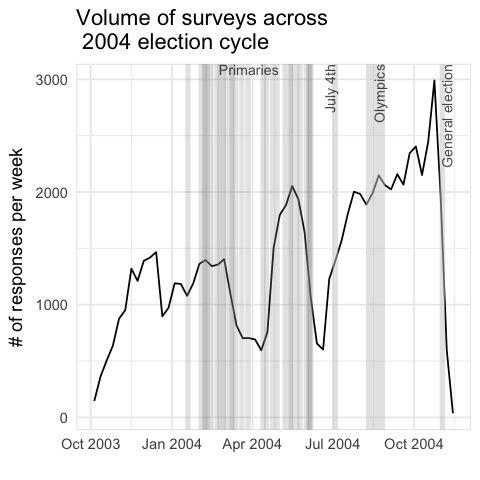

In [56]:
# Build a plot

options(repr.plot.width=4, repr.plot.height=4)

# Show line chart of absolute number of surveys
# Overlay with notable events
rects = tibble(start = ymd('2004-08-08'), 
                end = ymd('2004-08-29'),
                y1 = -Inf,
                y2 = Inf)

texts = tibble(x = c(ymd('2004-07-04'), ymd('2004-08-29'), 
                     ymd('2004-11-02'),
                    ymd('2004-05-01')),
                lab = c("July 4th", "Olympics", 
                        "General election",
                       "Primaries"),
                hjust = c(1, 1, 1, 1),
               vjust = c(0,0,1, 1),
               angle = c(90,90,90,0)
              )

# July 4th; election day
vlines = tibble(xint = c(ymd('2004-07-04'), ymd('2004-11-02'))
                )

naes_obs_04_total_obs <-
naes_obs_04_by_var %>%
group_by(year_week_date, total) %>%
summarise() %>%
ungroup()

ggplot() +
  geom_line(data = naes_obs_04_total_obs, aes(x = ymd(year_week_date), y = total)) +
  geom_rect(data = rects, aes(xmin = start, xmax=end, ymin=-Inf, ymax=Inf), 
            fill="grey80", alpha=0.5) +

  geom_vline(data = vlines, aes(xintercept = as.numeric(xint)), color = "grey80", size=1.5, alpha=0.5) +

  geom_vline(data = prim_04_clean, aes(xintercept = as.numeric(mdy(prim_04_clean$date))), color = "grey60", size=1.5, alpha=0.25) +

  geom_text(data=texts, aes(x = x, y=Inf, label = lab, hjust=hjust, vjust=vjust, angle=angle), 
            size=3, alpha=0.7, color="black") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", colour = "grey90")) +
  labs(x = "",
      y="# of responses per week",
      title = "Volume of surveys across \n 2004 election cycle")

In part I'm interested in looking at how attitudes change at precisely those times when attention to politics is lowest. The problem is that this is also the time when there are the fewest polls, but the NAES has me covered - at least somewhat. Even at it's lowest in 2004, I'm getting at least 600 responses in the middle of the summer.

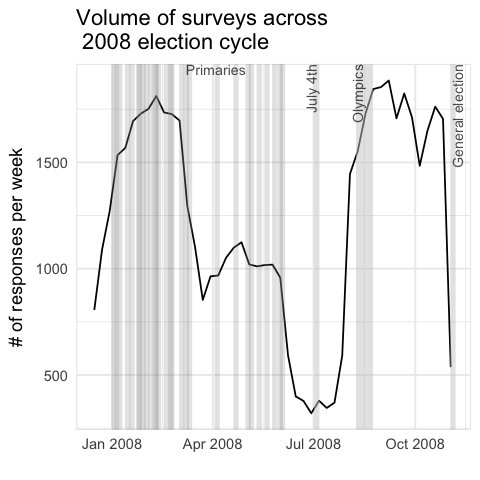

In [57]:
options(repr.plot.width=4, repr.plot.height=4)

# Show line chart of absolute number of surveys
# Overlay with notable events

rects = tibble(start = ymd('2008-08-08'), 
                end = ymd('2008-08-24'),
                y1 = -Inf,
                y2 = Inf)

texts = tibble(x = c(ymd('2008-07-04'), ymd('2008-08-24'), ymd('2008-11-04'), ymd('2008-05-01')),
                lab = c("July 4th", "Olympics", "General election", "Primaries"),
                hjust = c(1, 1, 1,1),
               vjust = c(0,-1,1, 1),
               angle = c(90,90,90,0)
              )

vlines = tibble(xint = c(ymd('2008-07-04'), ymd('2008-11-04'))
                )

naes_obs_08_total_obs <-
naes_obs_08_by_var %>%
group_by(year_week_date, total) %>%
summarise() %>%
ungroup()

ggplot() +
  geom_line(data = naes_obs_08_total_obs, aes(x = ymd(year_week_date), y = total)) +
  geom_rect(data = rects, aes(xmin = start, xmax=end, ymin=-Inf, ymax=Inf), 
            fill="grey80", alpha=0.5) +

  geom_vline(data = vlines, aes(xintercept = as.numeric(xint)), color = "grey80", size=1.5, alpha=0.5) +

  geom_vline(data = prim_08_clean, aes(xintercept = as.numeric(mdy(prim_08_clean$date))), color = "grey60", size=1.5, alpha=0.25) +

  geom_text(data=texts, aes(x = x, y=Inf, label = lab, hjust=hjust, vjust=vjust, angle=angle), 
            size=3, alpha=0.7, color="black") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", colour = "grey90")) +
  labs(x = "",
      y="# of responses per week",
      title = "Volume of surveys across \n 2008 election cycle") +
  scale_x_date(date_labels = "%b %Y")

Here I'm interested in looking at the distribution of a few of my variables of interest over time, so I build functions that build frequency tables and using these to chart trends over time according to the variable I specify in the function.

### Programmatically visualizing variables of interest over time

In [59]:
## NAES 2004 - DV distribution over time

#### Making a table of stats - both overall and broken down by PID - to show change over time in DVs
naes04_dv_chart_var_levels <- function(varname){
    
    # var_levels <-
    naes_04_clean_obs_table %>%
    with(., get(varname)) %>%
    levels()
}

naes04_dv_chart_var_by_pid <- function(varname, var_levels){
    # var_by_pid <-
    naes_04_clean_obs_table %>%
    mutate(year_week_date = ymd(year_week_date),
           var = varname) %>%
    group_by(year_week_date, var, pid3_recoded, get(varname)) %>%
    summarise(pos_by_pid = n() ) %>%
    filter(`get(varname)` != 'NA') %>%
    filter(pid3_recoded != 'NA') %>%
    arrange(year_week_date) %>%
    spread(key = `get(varname)`, value = pos_by_pid) %>%
    mutate(total_by_pid = sum(get(var_levels[1]) + get(var_levels[2])),
           pct_pos_by_pid = get(var_levels[1]) / total_by_pid,
           moe_pos_by_pid = 1.96*sqrt(pct_pos_by_pid* (1-pct_pos_by_pid) / total_by_pid)
          )
}

naes04_dv_chart_var_agg <- function(varname, var_levels){
    # var_agg <-
    naes_04_clean_obs_table %>%
    mutate(year_week_date = ymd(year_week_date),
           var = varname) %>%
    group_by(year_week_date, var, pid3_recoded, get(varname)) %>%
    summarise(pos_by_pid = n() ) %>%
    filter(`get(varname)` != 'NA') %>%
    filter(pid3_recoded != 'NA') %>%
    arrange(year_week_date) %>%
    spread(key = `get(varname)`, value = pos_by_pid) %>%
    mutate(total_by_pid = sum(get(var_levels[1]) + get(var_levels[2]))
          ) %>%
    group_by(year_week_date, var) %>%
    summarise(sum_pos_all = sum(get(var_levels[1])),
              total_all = sum(total_by_pid),
              pct_pos_all = sum_pos_all / total_all,
              moe_pos_all = 1.96*sqrt(pct_pos_all* (1-pct_pos_all) / total_all) )
}

naes04_dv_chart_by_pid <- function(varname) {
    var_levels <- naes04_dv_chart_var_levels(varname)
    
    var_by_pid <- naes04_dv_chart_var_by_pid(varname, var_levels)

# overlay events

rects = tibble(start = ymd('2004-08-08'), 
                end = ymd('2004-08-29'),
                y1 = -Inf,
                y2 = Inf)

texts = tibble(x = c(ymd('2004-07-04'), ymd('2004-08-29'), 
                     ymd('2004-11-02'),
                    ymd('2004-05-01')),
                lab = c("July 4th", "Olympics", 
                        "General election",
                       "Primaries"),
                hjust = c(1, 1, 1, 1),
               vjust = c(0,0,1, 1),
               angle = c(90,90,90,0)
              )

vlines = tibble(xint = c(ymd('2004-07-04'), ymd('2004-11-02'))
                )

## Make Chart of DV, by party

ggplot() +
  geom_line(data = var_by_pid %>% filter(pid3_recoded != "True independent"), 
            aes(x = ymd(year_week_date), color = pid3_recoded, y = pct_pos_by_pid), alpha=0.6) +
  geom_ribbon(data = var_by_pid %>% filter(pid3_recoded != "True independent"), 
            aes(x = ymd(year_week_date), fill = pid3_recoded, 
                ymin = pct_pos_by_pid - moe_pos_by_pid, 
                ymax = pct_pos_by_pid + moe_pos_by_pid), alpha=0.3) +
#   geom_smooth(data = var_by_pid %>% filter(pid3_recoded != "True independent"), 
#             aes(x = ymd(year_week_date), fill = pid3_recoded, color = pid3_recoded, 
#                 y = pct_pos_by_pid), alpha=0.3) +
  geom_rect(data = rects, aes(xmin = start, xmax=end, ymin=-Inf, ymax=Inf), 
            fill="grey80", alpha=0.5) +

  geom_vline(data = vlines, aes(xintercept = as.numeric(xint)), color = "grey80", size=1.5, alpha=0.5) +

#   geom_vline(data = prim_04_clean, aes(xintercept = as.numeric(mdy(prim_04_clean$date))), color = "grey60", size=1.5, alpha=0.25) +

  geom_text(data=texts, aes(x = x, y=Inf, label = lab, hjust=hjust, vjust=vjust, angle=angle), 
            size=3, alpha=0.7, color="black") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", colour = "grey90")) +
  labs(x = "",
      y=paste0("% '", var_levels[1], "'"),
      title = paste0(varname, " across the \n '04 electoral cycle")) +
  scale_x_date(date_labels = "%b %y")
#   ylim(0.05, 0.6)
}

options(repr.plot.width=4, repr.plot.height=4)


## Make Chart of DV, aggregate

naes04_dv_chart_agg <- function(varname) {
    var_levels <- naes04_dv_chart_var_levels(varname)
    
    var_agg <- naes04_dv_chart_var_agg(varname, var_levels)

# overlay events

rects = tibble(start = ymd('2004-08-08'), 
                end = ymd('2004-08-29'),
                y1 = -Inf,
                y2 = Inf)

texts = tibble(x = c(ymd('2004-07-04'), ymd('2004-08-29'), 
                     ymd('2004-11-02'),
                    ymd('2004-05-01')),
                lab = c("July 4th", "Olympics", 
                        "General election",
                       "Primaries"),
                hjust = c(1, 1, 1, 1),
               vjust = c(0,0,1, 1),
               angle = c(90,90,90,0)
              )

vlines = tibble(xint = c(ymd('2004-07-04'), ymd('2004-11-02'))
                )
    
ggplot() +
  geom_line(data = var_agg, 
            aes(x = ymd(year_week_date), y = pct_pos_all), alpha=0.6) +
  geom_ribbon(data = var_agg, 
            aes(x = ymd(year_week_date), 
                ymin = pct_pos_all - moe_pos_all, 
                ymax = pct_pos_all + moe_pos_all), alpha=0.3) +
#   geom_smooth(data = var_agg, 
#             aes(x = ymd(year_week_date), 
#                 y = pct_pos_all), alpha=0.3) +
  geom_rect(data = rects, aes(xmin = start, xmax=end, ymin=-Inf, ymax=Inf), 
            fill="grey80", alpha=0.5) +

  geom_vline(data = vlines, aes(xintercept = as.numeric(xint)), color = "grey80", size=1.5, alpha=0.5) +

#   geom_vline(data = prim_04_clean, aes(xintercept = as.numeric(mdy(prim_04_clean$date))), color = "grey60", size=1.5, alpha=0.25) +

  geom_text(data=texts, aes(x = x, y=Inf, label = lab, hjust=hjust, vjust=vjust, angle=angle), 
            size=3, alpha=0.7, color="black") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", colour = "grey90")) +
  labs(x = "",
      y=paste0("% '", var_levels[1], "'"),
      title = paste0(varname, " across the \n 2004 electoral cycle")) +
  scale_x_date(date_labels = "%b %y")
#   ylim(0.05, 0.6)
}

I impliment the function above, showing the trend of Democratic candidate favorability, overall and by party. These aren't suitable for publication but let me quickly generate lots of visualizations to see what I've got.

Warning message:
“Removed 1 rows containing missing values (geom_path).”

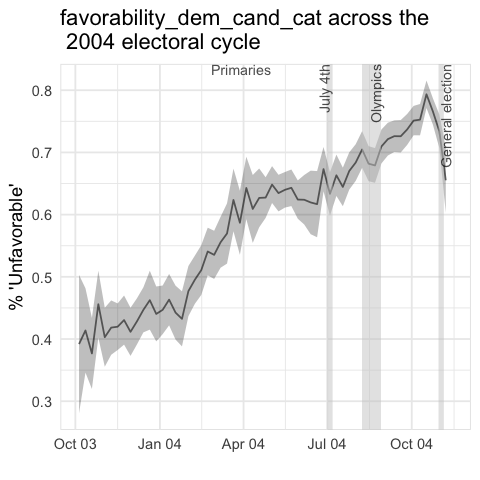

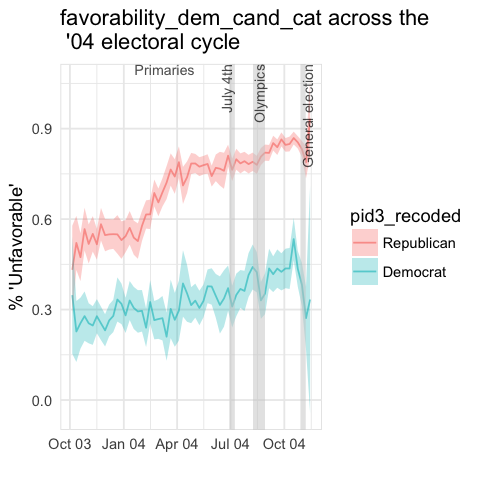

In [61]:
dv_names_04 <-
naes_04_clean_obs_table %>%
select(trust_govt1, favorability_repub_cand_cat, favorability_dem_cand_cat, approve_pres, approve_pres_econ) %>%
names()

naes04_dv_chart_agg(dv_names_04[3])
naes04_dv_chart_by_pid(dv_names_04[3])


Warning message:
“Removed 1 rows containing missing values (geom_path).”

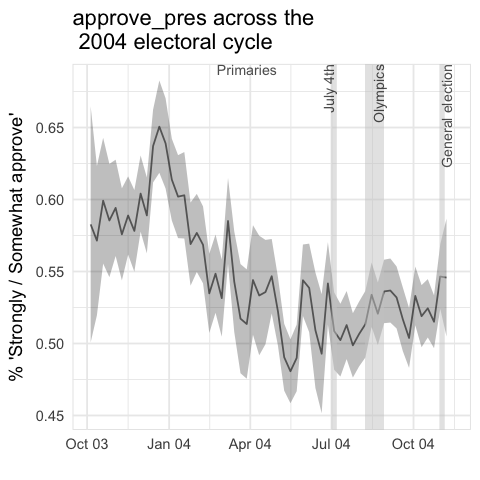

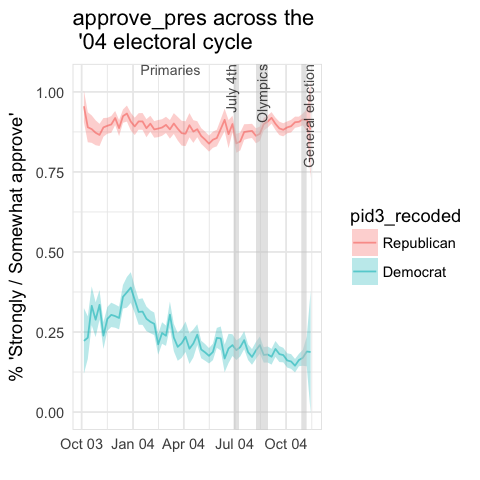

In [62]:
naes04_dv_chart_agg(dv_names_04[4])
naes04_dv_chart_by_pid(dv_names_04[4])

### Automating draws of multiple samples from the Google Trends API

I'm interested in measuring partisan salience as it changes over time in the electoral cycle. There's a nice API wrapper that makes this fairly straightforward, but a little research tells me that it's important to take multiple samples for each query, so I build a function that makes multiple pulls, stores them in a list and aggregates them.

In [ ]:
library(gtrendsR)

# Functions to pull multiple samples of a query, build a list of all data,
# extract interest over time, yield a tibble of useful data and save both to file

####################################################################################

stamp_string <- function(...){
    now(tzone = "America/Chicago") %>%
    str_replace_all(., "[\\-\\:]", "") %>%
    str_replace_all(., "[\\s]", "_")
}

# Multiple pulls of the same query: yields timestamped list
gtrends_loop_pull <- function(q, n=20, time, geo=c("US"), s=2){
    
    require(tidyverse)
    require(lubridate)
    require(stringr)
    library(gtrendsR)
    
    # Make timestamp string
    stamp <- stamp_string()
    
    #Instantiate list; message: list name
    list_name <- paste0("gtrends_pull_", stamp)
    gtrends_list <- list()
    message("List name:", list_name)
    
    for (i in 1:n){
        # Pull gtrends
        pull <- gtrends(q, geo = geo, time = time)
        
        # Add timestamp for the pull object
        pull[['stamp']] <- now(tzone = "America/Chicago")
        
        # Number the pull object
        pull_serial <- paste0("pull", i)   
        gtrends_list[[pull_serial]] <- pull
        
        # Message: pulling
        message(paste0("Pulling ", i, " (", pull[['stamp']], ")")) 
        
        Sys.sleep(s) # So as not to get rate limited / banned
        }
        
    assign(list_name, gtrends_list)
        
    get(list_name) # ?
}

# Yields merged table (as tibble) of interest over time
gtrends_data_merge <- function(gtrends_list){
    # Extract the data, name each col for the pull #, join together
    gtrends_list %>%
    transpose() %>%
    .[['interest_over_time']] %>%
    lmap(~{
        el_name <- names(.)

        names(.[[1]])[2] <- el_name

        tibble(.)
    }) %>%
    map(~.[[1]]) %>%
    map(~.[1:3]) %>%
    reduce(full_join)
}

In [ ]:
# 2004: Republicans
gtrends_list <- gtrends_loop_pull("republican + republicans", 
                  n=20, 
                  "2004-01-01 2005-01-20",
                  geo= c("US"),
                  s=2)

gtrends_data <-
gtrends_data_merge(gtrends_list)

#> Save full list

gtrends_path <- "../7_Data/Study_3/Google Trends/Data"

saveRDS(gtrends_list, file=paste0(gtrends_path, paste0("gtrends_list_2004_repub", "_full.RDS")))

#> Save just data

saveRDS(gtrends_data, file=paste0(gtrends_path, paste0("gtrends_data_2004_repub", "_df.RDS")))


# I do similar pulls for Republicans and Democrats, across the '04 and '08 cycles

In [64]:
# Load in google trends data after saving it earlier

library(lubridate)
library(stringr)
library(tidyverse)

gtrends_path <- "../7_Data/Study_3/Google Trends/Data"

gtrends_04_dem <- readRDS(paste0(gtrends_path, paste0("gtrends_data_2004_dem", "_df.RDS")))

gtrends_04_rep <- readRDS(paste0(gtrends_path, paste0("gtrends_data_2004_repub", "_df.RDS")))

gtrends_08_dem <- readRDS(paste0(gtrends_path, paste0("gtrends_data_2008_dem", "_df.RDS")))

gtrends_08_rep <- readRDS(paste0(gtrends_path, paste0("gtrends_data_2008_repub", "_df.RDS")))

gtrends_party_salience <-
list(gtrends_04_dem,
     gtrends_04_rep,
     gtrends_08_dem,
     gtrends_08_rep) %>%
map(select, date, pull1, keyword) %>%
map(~set_names(., c("date", 
            paste0(str_sub(.$keyword[1], 1, 3), "_salience"), "keyword"))) %>%
map(~as.tibble(.[,1:2])) %>%
reduce(full_join, by="date") %>%
transmute(date = date,
         dem_salience = coalesce(dem_salience.x, dem_salience.y),
         rep_salience = coalesce(rep_salience.x, rep_salience.y))

gtrends_path <- "../7_Data/Study_3/Google Trends/Data"

saveRDS(gtrends_party_salience, file=paste0(gtrends_path, "gtrends_party_salience.RDS"))

gtrends_party_salience_04 <-
gtrends_party_salience %>%
filter(ymd(date) < ymd('2006-01-01'))

gtrends_party_salience_08 <-
gtrends_party_salience %>%
filter(ymd(date) > ymd('2006-01-01'))

Now that I've pulled the data, I visualize it

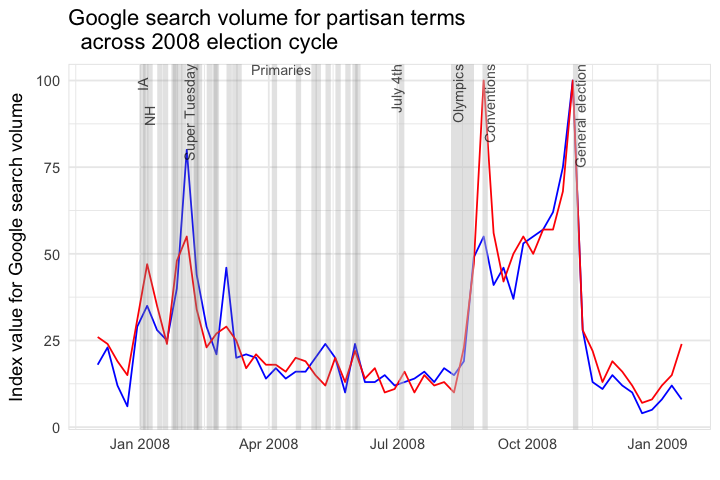

In [69]:
# 2008

options(repr.plot.width=6, repr.plot.height=4)

# Visualize gtrends by party over time for each year

rects = tibble(start = ymd('2008-08-08'), 
                end = ymd('2008-08-24'), 
                y1 = -Inf,
                y2 = Inf)

texts = tibble(x = c(ymd('2008-07-04'), ymd('2008-08-24'), 
                     ymd('2008-11-04'), ymd('2008-05-01'),
                    ymd('2008-09-01'), ymd('2008-01-03'), 
                     ymd('2008-01-08'), ymd('2008-02-05')),
                lab = c("July 4th", "Olympics", 
                        "General election", "Primaries",
                       "Conventions", "IA", "NH",
                       "Super Tuesday"),
                hjust = c(1, 1, 1, 1, 1,2,3,1),
               vjust = c(0,-1,1, 1, 1, 0.5, 0.5, 0.5),
               angle = c(90,90,90,0, 90, 90, 90, 90)
              )

vlines = tibble(xint = c(ymd('2008-07-04'), ymd('2008-11-04'), ymd('2008-09-01'))
                )

ggplot() +
#   geom_rect(data = gtrends_08_periods, 
#                  aes(xmin=ymd(grp_3wka_date_min), 
#                      xmax=ymd(grp_3wka_date_min)+20, 
#                      ymin=0, ymax=100, fill=as.character(grp_3wka)), alpha=0.1) +

  geom_line(data = gtrends_party_salience_08, aes(x = ymd(date), y = dem_salience), color=4) +
#   geom_smooth(data = gtrends_party_salience_08, aes(x = ymd(date), y = dem_salience), color=4) +
  geom_line(data = gtrends_party_salience_08, aes(x = ymd(date), y = rep_salience), color=2) +
#   geom_smooth(data = gtrends_party_salience_08, aes(x = ymd(date), y = rep_salience), color=2) +

  geom_rect(data = rects, aes(xmin = start, xmax=end, ymin=-Inf, ymax=Inf), 
            fill="grey80", alpha=0.5) +

  geom_vline(data = vlines, aes(xintercept = as.numeric(xint)), color = "grey80", size=1.5, alpha=0.5) +

  geom_vline(data = prim_08_clean, aes(xintercept = as.numeric(mdy(prim_08_clean$date))), color = "grey60", size=1.5, alpha=0.25) +

  geom_text(data=texts, aes(x = x, y=Inf, label = lab, hjust=hjust, vjust=vjust, angle=angle), 
            size=3, alpha=0.7, color="black") +
#   geom_rect(data = elex_cycle_period_08, 
#                  aes(xmin=ymd(xmin), 
#                      xmax=ymd(xmax), 
#                      ymin=0, ymax=100, fill=label), alpha=0.3) +

#   geom_errorbarh(data = elex_cycle_period_08, 
#                  aes(xmin=ymd(xmin), 
#                      xmax=ymd(xmax), 
#                      x=ymd(xmid), y=0), height=2) +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", colour = "grey90")) +
  labs(x = "",
      y="Index value for Google search volume",
      title = "Google search volume for partisan terms\n  across 2008 election cycle") +
  scale_x_date(date_labels = "%b %Y")

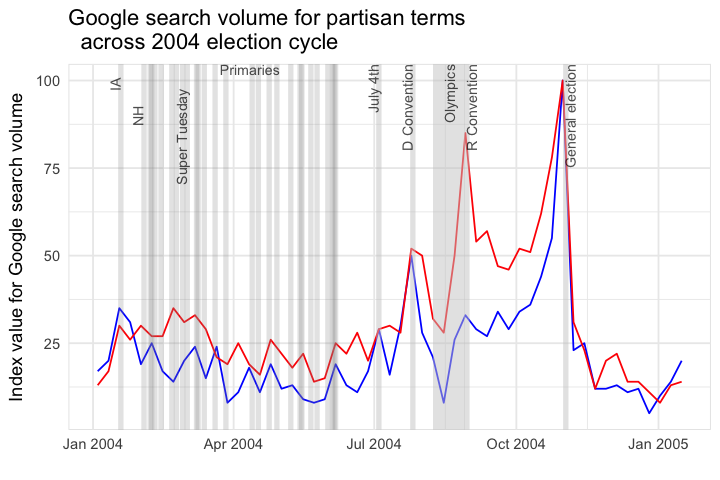

In [70]:
# 2004

options(repr.plot.width=6, repr.plot.height=4)

# Visualize gtrends by party over time for each year
rects = tibble(start = ymd('2004-08-08'), 
                end = ymd('2004-08-29'),
                y1 = -Inf,
                y2 = Inf)

texts = tibble(x = c(ymd('2004-07-04'), ymd('2004-08-29'), 
                     ymd('2004-11-02'),ymd('2004-05-01'),
                    ymd('2004-8-30'), ymd('2004-7-26'),
                    ymd('2004-01-19'), ymd('2004-01-27'),
                    ymd('2004-03-02')),
                lab = c("July 4th", "Olympics", 
                        "General election", "Primaries", 
                        "R Convention", "D Convention",
                       "IA", "NH", "Super Tuesday"),
                hjust = c(1, 1, 1, 1, 1,1,2,3, 1.25),
               vjust = c(0,-1,1, 1,1,0,0,1, 0),
               angle = c(90,90,90,0,90,90, 90, 90, 90)
              )

vlines = tibble(xint = c(ymd('2004-07-04'), ymd('2004-11-02'), 
                         ymd('2004-8-30'), ymd('2004-7-26'))
               )

ggplot() +
  geom_line(data = gtrends_party_salience_04, aes(x = ymd(date), y = dem_salience), color=4) +
#   geom_smooth(data = gtrends_party_salience_04, aes(x = ymd(date), y = dem_salience), color=4) +
  geom_line(data = gtrends_party_salience_04, aes(x = ymd(date), y = rep_salience), color=2) +
#   geom_smooth(data = gtrends_party_salience_04, aes(x = ymd(date), y = rep_salience), color=2) +
  geom_rect(data = rects, aes(xmin = start, xmax=end, ymin=-Inf, ymax=Inf), 
            fill="grey80", alpha=0.5) +

  geom_vline(data = vlines, aes(xintercept = as.numeric(xint)), color = "grey80", size=1.5, alpha=0.5) +

  geom_vline(data = prim_04_clean, aes(xintercept = as.numeric(mdy(prim_04_clean$date))), color = "grey60", size=1.5, alpha=0.25) +

  geom_text(data=texts, aes(x = x, y=Inf, label = lab, hjust=hjust, vjust=vjust, angle=angle), 
            size=3, alpha=0.7, color="black") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", colour = "grey90")) +
  labs(x = "",
      y="Index value for Google search volume",
      title = "Google search volume for partisan terms\n  across 2004 election cycle") +
  scale_x_date(date_labels = "%b %Y")

There are significant limitations/caveats to the Google Trends data. For interested parties:

## Limitations of Google Trends Data

Google trends data holds a lot of promise, but has some important limitations that should be enumerated clearly to explain what's going on here.

Google retains records of the searches that are made by users on a daily basis. Through their public-facing API (ie, Application Program Interface), Google allows the user to make a query of that data. The user can query individual keywords and the union or intersection of those keywords, up to five keywords at a time.

Google Trends data is useful as a measurement of the volume of queries made of a keyword or set of keywords, but the API does not produce an absolute count. What is returned is an interval-level measure of relative search volume, scaled from zero to 100. All queries specify a given time period and geographic area to which the query applies - e.g., Jan 1, 2008 - Dec 31, 2008, United States. Queries also specify a *resolution*, or the unit, of the smallest time period at which the data is aggregated - the minimum setting for which is set by Google based on a variety of factors. 

**Scale values are relative measures**

Google has an interest - whether for the sake of protecting the anonymity of its users or the value of its search data - in obscuring the data that is publicly reported. A query of 1 year returns data aggregated by week. A query for mentions of "Democrat" returns measurements for all covered weeks, aggregated for all users in the US. The maximum measurement is coded as 100 for any given query. The minimum meaningful value of the scale is 1 and all values are rounded to the nearest integer. This is an interval-level scale meaning - like the Fahrenheit or Celsius temperature scales - the interval units are equal within a given query, but there is no meaningful absolute zero to the scale and the relative scale of separate keywords can only be relative to one another, not absolute. That is, if two keywords are queried together, and we observe that the value for Democrats in a given week is 50 and it is 100 for Republicans, we can say that half as many searches were made for Democrats as Republicans.

This scale is fixed within a given query, so units across time periods within a query are comparable. Thus, a value of 80 in week 1 and 40 in week two indicates that half as many searches have been made in week 2 compared to week 1.

**Scale values are censored**

A code of zero - missing/censored data - indicates that the count for the given level of aggregation (by time period and geographic unit) for a given query is below an arbitrary, not-publicly-known threshold at which Google does not report data. Thus the sample is censored below index values of 1. This leads to a few important limtations: 

**Censoring due to low absolute volume**

First, if the search volume for a given keyword (within a given time period and geographic area) is too low, no reliable measurements can be made. This limits our analysis to large geographic areas and larger resolutions of time, but does not impact our ability to conduct this analysis in general.

**Censoring due to scale compression**

Second, and somewhat more of a tricky problem: the situation in which the user searches for two keywords within a given query where the difference in peak volume is fairly high. Recall that the scale for this data is set by the peak value for any keyword in the query. Thus, the variation in the search volume of the lower-volume keyword will be compressed - and some of these values may be censored.Eeven if this keyword would yield valid data when searched for on its own (ie, it does not drop below the volume threshold google sets) Google Trends only returns integer values for its scale, so the relative measure would be rounded down so as to be indistinguishable from censored data in this instance.

**Returned values are samples**

Note also that all queries of Google Trends represent samples; they are not based on full counts of Google search history. This is likely due both to logistical as well as privacy concerns. Thus, there is some amount of sampling error inherent in the data returned by each query. In practice, this can be mitigated fairly easily by making repeated draws, which are enabled by being able to programmatically request repeated queries of the same values and aggregating across these repeated draws. Some guidance as to the amount of draws that should be taken exist in a small but growing literature on how to use this data.

Taking all of the above into account, Google Trends data nevertheless represents a powerful source of data, but it requires carefuly interpretation to the processing and analysis of that data.